In [ ]:
#Este script toma la pp acumulada del WRF para dos tiempos distintos,
#y obtiene la pp acumulada en ese período, grafica y lo guarda en netCDF

## Mili 16 de agosto 2016 ##

In [1]:
import fileinput
import numpy as np
from glob import glob
from scipy.io import netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset, num2date, date2index      # Librerías netCDF
import netCDF4
%matplotlib inline


ImportError: libmfhdf.so.0: cannot open shared object file: No such file or directory

In [18]:
#función que genera la propia barra de colores en RGB

def make_cmap(colors, position=None, bit=False):
#    '''
#    make_cmap takes a list of tuples which contain RGB values. The RGB
#    values may either be in 8-bit [0 to 255] (in which bit must be set to
#    True when called) or arithmetic [0 to 1] (default). make_cmap returns
#    a cmap with equally spaced colors.
#    Arrange your tuples so that the first color is the lowest value for the
#    colorbar and the last is the highest.
#    position contains values from 0 to 1 to dictate the location of each color.
#    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


In [19]:
fnames = glob('wrfout_*')


In [20]:
#Busco la precipitación acumulada hasta las 12 horas del dia 22
i=0
while i < len(fnames): 
    f =netcdf.netcdf_file(fnames[i]) 
    print(fnames[i][19:24])
    if fnames[i][19:24] == '22_12':
        rainnc_22_12 = f.variables['RAINNC'][0,:,:]
        lat_wrf_22_12 = f.variables['XLAT'][0,:,:]
        lon_wrf_22_12 = f.variables['XLONG'][0,:,:]
        
    i = i+1
       

22_21
22_22
22_15
23_04
22_23
22_20
22_12
23_00
23_01
23_03
22_16
22_17
22_19
22_18
23_11
23_07
22_14
22_13
23_05
23_09
23_06
23_02
23_12
23_08
23_10


/home/mili/anaconda2/lib/python2.7/site-packages/scipy/io/netcdf.py:297: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [21]:
#Busco la precipitación acumulada hasta las 12 horas del dia 23
i=0
while i < len(fnames): 
    f =netcdf.netcdf_file(fnames[i]) 
    print(fnames[i][19:24])
    if fnames[i][19:24] == '23_12':
        rainnc_23_12 = f.variables['RAINNC'][0,:,:]
        lat_wrf_23_12 = f.variables['XLAT'][0,:,:]
        lon_wrf_23_12 = f.variables['XLONG'][0,:,:]
        
    i = i+1
    


22_21
22_22
22_15
23_04
22_23
22_20
22_12
23_00
23_01
23_03
22_16
22_17
22_19
22_18
23_11
23_07
22_14
22_13
23_05
23_09
23_06
23_02
23_12
23_08
23_10


In [22]:
rainnc_23_12.shape

(589, 699)

In [23]:
#Resto ambos valores acumulados de precipitación


ppAcum36 = np.zeros((589, 699),dtype='f') 
rainnc_36hs = rainnc_23_12 - rainnc_22_12

In [24]:
## Grafico
imax,jmax = lat_wrf_22_12.shape
minlat = lat_wrf_22_12[0,0]
maxlat = lat_wrf_22_12[imax-1,jmax-1]
minlon = lon_wrf_22_12[0,0]
maxlon = lon_wrf_22_12[imax-1,jmax-1] 

#Parámetros de la proyección Lambert
lon_0 = -63.  
lat_0 = -31.
lat_1 = -31.
lat_2 = -31.

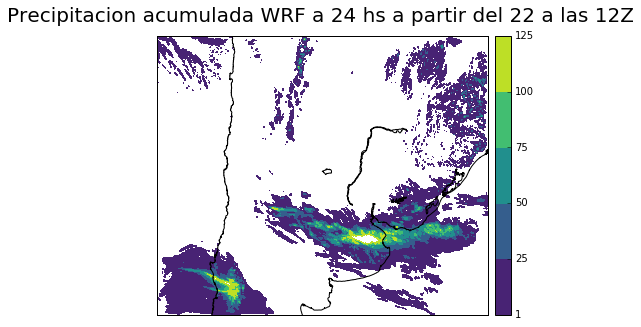

In [29]:
colors = [(0,255,0), (0,0,255), (255,0,0)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
###Genero los graficos de PP acumulada 
plt.figure(figsize=(15,5))
#plt.subplot(1,3,1)
lamb = Basemap(projection='lcc',lon_0=lon_0,lat_0=lat_0,\
              llcrnrlat=minlat,urcrnrlat=maxlat, llcrnrlon=minlon,urcrnrlon=maxlon,\
              lat_1=lat_1,lat_2=lat_2,resolution='h',area_thresh=1000.)
levels = [1,25,50,75,100,125]
#,150,175,200,250,300,350,400,450,500,1000,2000]
#levels = [1,25,50,75,100,125,150,175,200,250,300,350,400,450,500]
x2, y2 = lamb(lon_wrf_22_12,lat_wrf_22_12)
cmap = plt.get_cmap('viridis')
#cmap = plt.get_cmap('Spectral')
lamb.contourf(x2,y2,rainnc_36hs, levels=levels, cmap=cmap)
#lamb.contourf(x2,y2,rainnc_36hs, levels=levels, extend='both', cmap=cmap) #"extended" genera la barra de colores con los triangulos
#lamb.contourf(x2,y2,rainnc_36hs, levels=levels, cmap=my_cmap)
lamb.drawcoastlines()
plt.suptitle('Precipitacion acumulada WRF a 24 hs a partir del 22 a las 12Z', size=20)
lamb.colorbar()

In [25]:
#############################################################################
# Se guarda todo en un nuevo netcdf para poder realizar la validacion luego #
#############################################################################
    
try: newdata.close()  # por seguridad, nos aseguramos que el archivo no esté abierto ya 
except: pass
newfile='/datos/estaciones/wrf_ppAcum_36hs.nc'  
newdata=netCDF4.Dataset(newfile,'w')
newdata.title="Precipitacion acumulada entre 12Z del 22 a las 12Z del 23"
newdata.Conventions="COARDS"
newdata.dataType='Grid'
newdata.history='SDF Netcdf con los cálculos de precipitacion acumulada entre 12Z del 22 a las 12Z del 23'

newdata.createDimension('lat_wrf_22_12', lat_wrf_22_12.shape[0])
newdata.createDimension('lon_wrf_22_12', lon_wrf_22_12.shape[1])
#newdata.createDimension('time', len(fnames))

# Ahora guardo todas las variables y flags que calculé
### There is a little more flexibility with this variables attributes!
### (f4=float32) ###

lat_var=newdata.createVariable('lat','f4',('lat_wrf_22_12','lon_wrf_22_12'), fill_value=np.nan)
lat_var.long_name='Latitud '
lat_var.units='º'
lat_var[:]=lat_wrf_22_12[:]

lon_var=newdata.createVariable('lon','f4',('lat_wrf_22_12','lon_wrf_22_12'), fill_value=np.nan)
lon_var.long_name='Longitud '
lon_var.units='º'
lon_var[:]=lon_wrf_22_12[:]

rainnc_22_12_var=newdata.createVariable('rainnc_22_12','f4',('lat_wrf_22_12','lon_wrf_22_12'),fill_value=np.nan)
rainnc_22_12_var.long_name='Accumulated total cumulus precipitation hasta 22 12 Z'
rainnc_22_12_var.units='mm'
rainnc_22_12_var[:]=rainnc_22_12[:,:]

rainnc_23_12_var=newdata.createVariable('rainnc_23_12','f4',('lat_wrf_22_12','lon_wrf_22_12'),fill_value=np.nan)
rainnc_23_12_var.long_name='Accumulated total cumulus precipitation hasta 23 12 Z'
rainnc_23_12_var.units='mm'
rainnc_23_12_var[:]=rainnc_23_12[:,:]

rainnc_36hs_var=newdata.createVariable('rainnc_36hs','f4',('lat_wrf_22_12','lon_wrf_22_12'),fill_value=np.nan)
rainnc_36hs_var.long_name='Accumulated total grid scale precipitation por 24hs'
rainnc_36hs_var.units='mm'
rainnc_36hs_var[:]=rainnc_36hs[:,:]

newdata.close()

